<center><b>TRAINING A NEURAL NETWORK USING NUMPY</b><br><center>
<hr>
<ul>
<li>https://cs231n.github.io/neural-networks-case-study/#grad</li>
<li>https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation</li>
<li>https://ai.plainenglish.io/gradient-descent-update-rule-for-multiclass-logistic-regression-4bf3033cac10</li>
<li>https://blog.yani.ai/backpropagation/</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<center><b>GENERATING SAMPLE DATA</b></center>

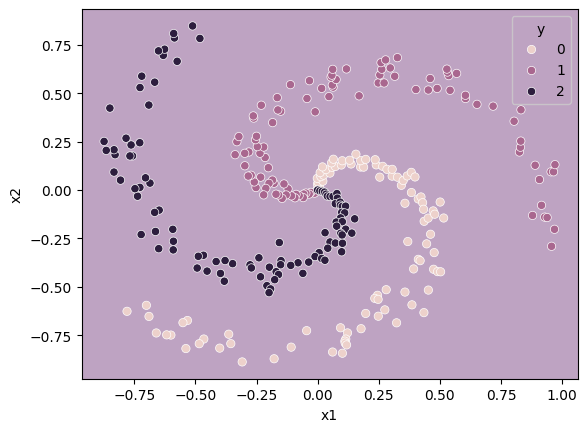

In [2]:
N = 100 # number of points per class 
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

## visualize data
data = {
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y
}
plt.rcParams['axes.facecolor'] = '#bea3c2'
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.show()

<center><b>TRAINING A NEURAL NETWORK WITH ONE HIDDEN LAYER</b></center>

In [17]:
# hyperparamters
h = 100   # number of hidden states
iterations = 10000
step_size = 0.5
reg = 1e-3

# constants
n_examples = X.shape[0]

# initialize the weights
W1 = np.random.randn(D,h)*0.01
W2 = np.random.randn(h,K)*0.01

b1 = np.zeros((1,h))
b2 = np.zeros((1,K))

# training loop
for iter in range(iterations):

    # calculate the scores
    hidden_scores = np.dot(X, W1) + b1
    hidden_scores = np.maximum(hidden_scores, 0) # relu activation function
    scores = np.dot(hidden_scores, W2) + b2

    # applying softmax
    exp_scores = np.exp(scores)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

    # loss calculation
    loss = -np.sum(np.log(probs[range(n_examples), y]))/n_examples + 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)

    # calculate gradients
    dscores2 = probs
    dscores2[range(n_examples), y]-=1
    dscores2 = dscores2/n_examples

    db2 = np.sum(dscores2, axis=0, keepdims=True)
    dW2 = np.dot(hidden_scores.T, dscores2) 

    dscores1 = np.dot(dscores2, W2.T)
    dscores1[hidden_scores==0] = 0       # backprop relu activation non-linearity

    db1 = np.sum(dscores1, axis=0, keepdims=True)
    dW1 = np.dot(X.T, dscores1)

    dW2 += reg*W2
    dW1 += reg*W1

    # performing gradient descent
    b2 = b2 - step_size * db2
    W2 = W2 - step_size * dW2
    b1 = b1 - step_size * db1
    W1 = W1 - step_size * dW1


    # accuracy calculation
    hidden_scores = np.dot(X, W1) + b1
    hidden_scores = np.maximum(hidden_scores, 0) # relu activation function
    scores = np.dot(hidden_scores, W2) + b2
    predictions = np.argmax(scores, axis=1)

    accuracy = np.sum(predictions == y)/n_examples

    print(f'iteration no {iter+1}: Loss: {loss}, accuracy: {accuracy}')


iteration no 1: Loss: 1.0987848703018153, accuracy: 0.19
iteration no 2: Loss: 1.0986448475539188, accuracy: 0.39666666666666667
iteration no 3: Loss: 1.0985036431928528, accuracy: 0.55
iteration no 4: Loss: 1.0983668409767626, accuracy: 0.5766666666666667
iteration no 5: Loss: 1.0982318120255623, accuracy: 0.5733333333333334
iteration no 6: Loss: 1.0980952397470594, accuracy: 0.5766666666666667
iteration no 7: Loss: 1.097958847518014, accuracy: 0.57
iteration no 8: Loss: 1.0978177990312767, accuracy: 0.5566666666666666
iteration no 9: Loss: 1.0976703760049353, accuracy: 0.5566666666666666
iteration no 10: Loss: 1.0975144720236343, accuracy: 0.5433333333333333
iteration no 11: Loss: 1.0973464782152982, accuracy: 0.5466666666666666
iteration no 12: Loss: 1.09716450181197, accuracy: 0.5366666666666666
iteration no 13: Loss: 1.096965330974789, accuracy: 0.5333333333333333
iteration no 14: Loss: 1.0967469410733028, accuracy: 0.5266666666666666
iteration no 15: Loss: 1.0965077800934944, acc

<hr>
<center><b>ACHIEVED ACCURACY OF 99% </b><center>
<hr>